# ***Digit Recognition Model***


### *The motive of this project is to understand the mathematics behind **neural networks** along with implementing and analyzing the effect various parametres such as learning rate, initial conditions and collective or distributed rendering.*

#### *The neural network consists of one hidden layer, and a essential implementation of activation functions which are ReLU (Rectified Linear Unit) and Entropy Cost function*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
data = pd.read_csv('./data/train.csv')

## *Initial Conditions*

In [85]:
data = np.array(data)

Y_train = data[:, 0]
X_train = data[:, 1:]

m, n = X_train.shape

def init(x, y):
    return np.random.uniform(-1.0, 1.0, size=(x, y))/np.sqrt(x*y)
    
W1 = init(128, 784)
W2 = init(10, 128)
B1 = np.random.uniform(-1.0, 1.0, size = (128, 1))
B2 = np.random.uniform(-1.0, 1.0, size = (10, 1))

r = 1.0e-7
X_train = X_train.T

## *Activation Functions*

$$RelU : f(x) = max(0, x)$$ <br>
$$Softmax : f(x_i) = \frac{e^{x_i}}{\sum_{i}{e^{x_i}}}$$

In [86]:
def softmax(X):
    a = np.exp(X)/np.sum(np.exp(X), axis = 0)
    return a

def relU(X):
    return np.where(X>0, X, 0)

def dRelU(X):
    return np.where(X>0, 1, 0)


## *Forward and Backward propagation step*

- This is the most crucial and most mathematical step of the model training.
- The gradient section of the code contains the derivatives of cost function with respect to each of the weights and biases.
- In order to calculate that we also have to calulate the derivative with respect to each layer which forms the network.
- After doing that just simply update the parametres with an appropriately chosen learning rate.

In [87]:
def forward_backwardPass(X, W1, W2, b1, b2, size, targets):    

    # Current parametres
    z1 = W1@X + b1
    A1 = relU(z1)
    z2 = W2@A1 + b2
    A2 = softmax(z2)

    # Error
    E = A2 - targets

    # Gradients
    dE_dW2 = 2*(A2 - targets)@A1.T
    dE_db2 = np.array([2*(A2 - targets).mean(axis = 1)]).T
    dE_dz1 = 2*(W2.T@(A2-targets))*dRelU(z1)
    dE_dW1 = dE_dz1@X.T
    dE_db1 = np.array([dE_dz1.mean(axis = 1)]).T
    dE_dX = W1.T@dE_dz1

    # Updates
    W2 = W2 - r*dE_dW2
    W1 = W1 - r*dE_dW1
    b2 = b2 - r*dE_db2
    b1 = b1 - r*dE_db1
    z1 = z1 - r*dE_dz1
    X = X - r*dE_dX
        
    return W1, W2, b1, b2, np.max(A2, axis = 0)

## *Batch Rendering*

- Divided the overall dataset of **42000** samples into *42 batches* of **1000** each.
- Analyzing the **mean** of the **maximum value** of the **prediction vector** over all the data set.
- This mean value should eventually converge to **1**, the more the convergence the more our model will predict accurately.

In [104]:
size = 1000
Mean = []
for j in range(20):
    targets = np.zeros((size,10), np.float32)
    targets[range(targets.shape[0]),Y_train[size*j:size*(j+1)]] = 1
    targets = targets.T
    
    X = X_train[:, size*j:size*(j+1)]

    for i in range(200):
        W1, W2, B1, B2, E = forward_backwardPass(X, W1, W2, B1, B2, size, targets)
    Mean.append(np.mean(E))
    print(np.mean(E))


0.9767589297893714
0.9771679525402703
0.9785011330239334
0.9795418227125657
0.9796051989773702
0.980854860586822
0.977329603079303
0.9744641477656146
0.9828846587996971
0.9826854057363742
0.980753526339813
0.9822450525819342
0.9822582274695776
0.9791206874555223
0.9821534953973492
0.9857724372906084
0.9821228728867694
0.9834900470032101
0.9816439033373177
0.9863147665779984


## Load the testing data

In [105]:
print(B2.shape)
test = pd.read_csv('./data/test.csv')
test = np.array(test).T
final = np.argmax(softmax(W2@relU(W1@test + B1) + B2), axis = 0)
print(final)

(10, 1)
[2 0 9 ... 3 9 2]


In [106]:
def plotImage(D):
    D = np.reshape(D, (28, 28))
    return D

## *Prediction*

***The images below shows the actual image and the title above each image shows the predicted value which is quite accurate for beginner model :)***

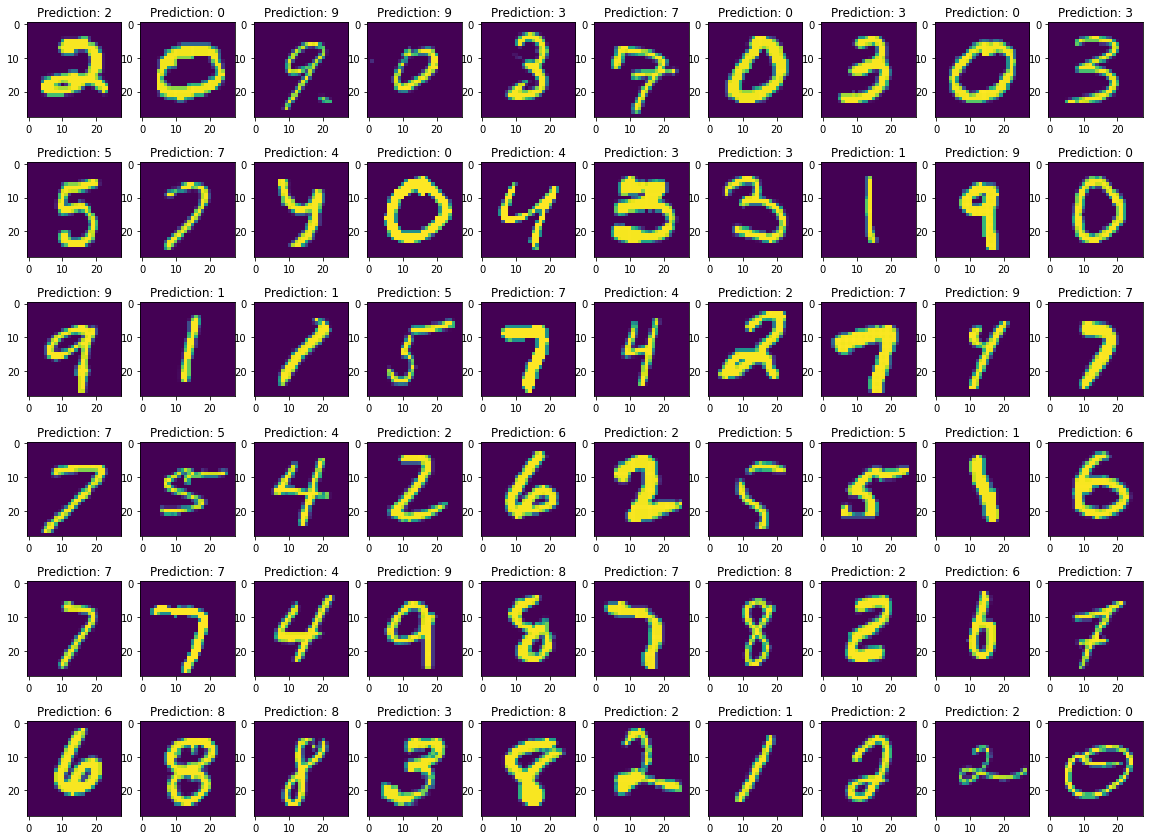

In [107]:
rows = 6
cols = 10
fig, ax = plt.subplots(rows, cols, figsize=(20,15))
for j in range(rows):
    for i in range(cols):
        ax[j, i].imshow(plotImage(test[:,10*j + i]))
        ax[j, i].set_title(f"Prediction: {final[10*j + i]}")
    
plt.show()